## Implementação do Algoritmo PageRank
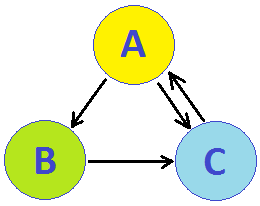

In [241]:
import pandas as pd
import networkx as nx
import pyensae
import pyquickhelper

In [242]:
example = pd.read_csv("data/web-Google-test.txt",sep = "\t", names=['from','to'])
example

,from,to
0,A,C
1,B,C
2,C,A
3,A,B


In [243]:
G = nx.from_pandas_dataframe(example, 'from', 'to',create_using=nx.DiGraph())
G

In [244]:
import matplotlib as mp
%matplotlib inline 

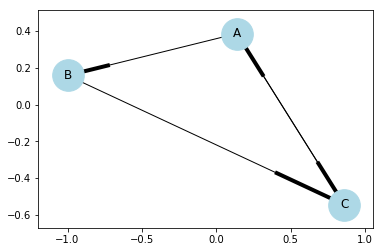

In [245]:
import matplotlib.pyplot as plt
nx.draw_networkx(G, node_color = 'lightblue', node_size = 1000,arrows=True)
plt.show()

In [246]:
from operator import add
sc = SparkContext.getOrCreate()

In [247]:
diretorio_base = os.path.join('data')
caminho_teste = os.path.join('web-Google-test.txt')
arquivo_teste = os.path.join(diretorio_base, caminho_teste)

In [248]:
def atualizaRank(listaUrls, rank):
    num_urls = len(listaUrls)
    rankAtualizado = []
    for x in listaUrls:
        rankAtualizado.append((x, (rank / num_urls)))
    return rankAtualizado

In [249]:
#numPartitions = 2
#rawData = sc.textFile(fileName, numPartitions)
linksGoogle_teste = sc.textFile(arquivo_teste).filter(lambda x: "#" not in x).map(lambda x: x.split("\t"))

In [250]:
linksAgrupados_teste = linksGoogle_teste.groupByKey().cache()
#print(linksAgrupados.take(1))
#for it in linksAgrupados.take(1)[0][1]:
#  print(it)


In [251]:
ranks_teste = linksAgrupados_teste.map(lambda url_agrupados: (url_agrupados[0], 1.0))

In [252]:
for x in range(0,4):
    # Adiciona ranks inicializados com 1.0 na posição [1][1] da matriz
    agrupaIdLinkComRank_teste = linksAgrupados_teste .join(ranks_teste)\
                .flatMap(lambda url_rank: atualizaRank(url_rank[1][0], url_rank[1][1]))
    # Soma os valores com o mesmo id e adiciona o fator de normalização
    ranks_teste = agrupaIdLinkComRank_teste.reduceByKey(add)\
                                .mapValues(lambda rankFatorD: (rankFatorD * 0.85) + 0.15)


In [253]:
for (link, rank) in ranks_teste.sortBy(lambda x:-x[1]).take(3):
    print("ID: %s  Ranking: %s." % (link, rank))

ID: C  Ranking: 1.2172812499999996.
ID: A  Ranking: 1.1846890624999995.
ID: B  Ranking: 0.5980296875.


In [254]:
diretorio_base = os.path.join('data')
caminho = os.path.join('web-Google.txt')
arquivo = os.path.join(diretorio_base, caminho)

In [255]:
linksGoogle = sc.textFile(arquivo).filter(lambda x: "#" not in x).map(lambda x: x.split("\t"))

In [256]:
linksAgrupados = linksGoogle.groupByKey().cache()

In [257]:
ranks = linksAgrupados.map(lambda url_agrupados: (url_agrupados[0], 1.0))

In [258]:
for x in range(0,4):
    # Adiciona ranks inicializados com 1.0 na posição [1][1] da matriz
    agrupaIdLinkComRank = linksAgrupados.join(ranks)\
                .flatMap(lambda url_rank: atualizaRank(url_rank[1][0], url_rank[1][1]))
    # Soma os valores com o mesmo id e adiciona o fator de normalização
    ranks = agrupaIdLinkComRank.reduceByKey(add)\
                                .mapValues(lambda rankFatorD: (rankFatorD * 0.85) + 0.15)

In [259]:
for (link, rank) in ranks.sortBy(lambda x:-x[1]).take(10):
    print("ID: %s  Ranking: %s." % (link, rank))

ID: 41909  Ranking: 544.7603838034137.
ID: 597621  Ranking: 516.1309386870741.
ID: 163075  Ranking: 497.7467250780177.
ID: 537039  Ranking: 497.4740498388902.
ID: 504140  Ranking: 463.95573700598715.
ID: 486980  Ranking: 462.6783661013936.
ID: 384666  Ranking: 454.26555915438047.
ID: 605856  Ranking: 446.3169809256028.
ID: 558791  Ranking: 437.19442425986136.
ID: 751384  Ranking: 432.2292514989112.
